In [1]:
# Data Wrangling
# Aplicar funções que são frequentemente utilizadas na manipulação de dados

!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install xlrd

In [2]:
# Importando os pacotes

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Matplotlib created a temporary cache directory at /tmp/matplotlib-0fa0g0_a because the default path (/home/coder/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [3]:
# Importando os bancos de dados

dados_tempo = pd.read_excel('(1.2)_dataset_principal.xls')
dados_merge = pd.read_excel('(1.3)_dataset_join.xls')
# "dados_tempo" - Fonte: Fávero & Belfiore (2024, Cap. 12)

In [4]:
# Visualizando informações básicas do dataset

## Algumas formas para visualizar informações do dataset

# Configurar para printar objetos no console

pd.set_option("display.max.columns", None)

print(dados_tempo)


     Estudante  Tempo para chegar à escola (minutos)  \
0     Gabriela                                    15   
1       Dalila                                    20   
2      Gustavo                                    20   
3      Letícia                                    40   
4  Luiz Ovídio                                    50   
5       Leonor                                    25   
6          Ana                                    10   
7      Antônio                                    55   
8        Júlia                                    35   
9      Mariana                                    30   

   Distância percorrida até a escola (quilômetros)  Quantidade de semáforos  \
0                                                8                        0   
1                                                6                        1   
2                                               15                        0   
3                                               20                 

In [5]:
# Somente os nomes das variáveis

dados_tempo.columns

Index(['Estudante', 'Tempo para chegar à escola (minutos)',
       'Distância percorrida até a escola (quilômetros)',
       'Quantidade de semáforos', 'Período do dia', 'Perfil ao volante'],
      dtype='object')

In [6]:
# Somente as primeiras "n" observações + nomes das variáveis

dados_tempo.head(n=5)

,Estudante,Tempo para chegar à escola (minutos),Distância percorrida até a escola (quilômetros),Quantidade de semáforos,Período do dia,Perfil ao volante
0,Gabriela,15,8,0,Manhã,calmo
1,Dalila,20,6,1,Manhã,moderado
2,Gustavo,20,15,0,Manhã,moderado
3,Letícia,40,20,1,Tarde,agressivo
4,Luiz Ovídio,50,25,2,Tarde,agressivo


In [7]:
# Somente as últimas "n" observações + nome das variáveis

dados_tempo.tail(n=3)

,Estudante,Tempo para chegar à escola (minutos),Distância percorrida até a escola (quilômetros),Quantidade de semáforos,Período do dia,Perfil ao volante
7,Antônio,55,32,3,Tarde,calmo
8,Júlia,35,28,1,Manhã,moderado
9,Mariana,30,20,1,Manhã,moderado


In [8]:
# Informações detalhadas sobre as variáveis

dados_tempo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   Estudante                                        10 non-null     object
 1   Tempo para chegar à escola (minutos)             10 non-null     int64 
 2   Distância percorrida até a escola (quilômetros)  10 non-null     int64 
 3   Quantidade de semáforos                          10 non-null     int64 
 4   Período do dia                                   10 non-null     object
 5   Perfil ao volante                                10 non-null     object
dtypes: int64(3), object(3)
memory usage: 608.0+ bytes


In [10]:
# object = variável de texto
# int ou float = variável numérica (métrica)
# category = variável categórica (qualitativa)

#%% Alterando os nomes das variáveis

# No dataset de exemplo, os nomes das variáveis contêm:
# Espaços, maiúsculas, acentos e caracteres especiais...
# É melhor não utilizá-los, pois podem gerar conflito e dificultam a escrita

# Função "rename": utilizada para alterar o nome das variáveis

# Renomeando todas as variáveis pelos nomes

dados_tempo = dados_tempo.rename(columns={'Estudante':'estudante',
                                          'Tempo para chegar à escola (minutos)':'tempo',
                                          'Distância percorrida até a escola (quilômetros)': 'distancia',
                                          'Quantidade de semáforos': 'semaforos',
                                          'Período do dia': 'periodo',
                                          'Perfil ao volante': 'perfil'})

In [11]:
# A seguir, vamos criar um objeto com nomes trocados
# Porém, a referência da variável está pela posição da coluna
# Em datasets com muitas variáveis, esta função facilita a escrita do código
# Lembrando: no Python as contagens de colunas e linhas iniciam-se em zero!

# Renomeando as variáveis pela sua posição (criando um objeto)
# Não é necessário trocar todos os nomes, pode ser um ou alguns deles

dados_novo = dados_tempo.rename(columns={dados_tempo.columns[0]: 'obs',
                                         dados_tempo.columns[1]: 'temp',
                                         dados_tempo.columns[5]: 'perf'})

# Para reescrever o mesmo objeto, poderia utilizar argumento inplace=True

dados_novo.rename(columns={'distancia': 'dist',
                           'semaforos': 'sem',
                           'periodo': 'per'},
                  inplace=True)

In [14]:
#%% Selecionando observações e variáveis de interesse

# Selecionando com base nas posições (1º arg.: linhas, 2º arg.: colunas)
# ATENÇÃO: no Python as contagens de colunas e linhas iniciam-se em zero!

print(dados_tempo.iloc[3,])
print(dados_tempo.iloc[:,4]) # argumento : indicam vazio na linha
print(dados_tempo.iloc[2:5,]) # note que exclui a posição final
print(dados_tempo.iloc[:,3:5]) # note que exclui a posição final
print(dados_tempo.iloc[2:4,3:5]) # note que exclui as posições finais
print(dados_tempo.iloc[5,4])

estudante      Letícia
tempo               40
distancia           20
semaforos            1
periodo          Tarde
perfil       agressivo
Name: 3, dtype: object
0    Manhã
1    Manhã
2    Manhã
3    Tarde
4    Tarde
5    Manhã
6    Manhã
7    Tarde
8    Manhã
9    Manhã
Name: periodo, dtype: object
     estudante  tempo  distancia  semaforos periodo     perfil
2      Gustavo     20         15          0   Manhã   moderado
3      Letícia     40         20          1   Tarde  agressivo
4  Luiz Ovídio     50         25          2   Tarde  agressivo
   semaforos periodo
0          0   Manhã
1          1   Manhã
2          0   Manhã
3          1   Tarde
4          2   Tarde
5          1   Manhã
6          0   Manhã
7          3   Tarde
8          1   Manhã
9          1   Manhã
   semaforos periodo
2          0   Manhã
3          1   Tarde
Manhã


In [15]:
# Detalhar uma variável em específico pelo nome

dados_tempo['tempo']
var_tempo = dados_tempo['tempo']

dados_tempo.perfil
var_perfil = dados_tempo.perfil

In [16]:
# Se for mais de uma variável, inserir o argumento como uma lista

dados_tempo[['tempo', 'perfil']]
var_tempo_perfil = dados_tempo[['tempo', 'perfil']]

In [17]:
# Selecionando variáveis por meio de um início em comum

selec_1 = dados_tempo.loc[:, dados_tempo.columns.str.startswith('per')]

In [18]:
# Selecionando variáveis por meio de um final em comum

selec_2 = dados_tempo.loc[:, dados_tempo.columns.str.endswith('o')]

In [19]:
#%% Criação e alteração de variáveis e seus conteúdos

## 1. Vamos adicionar uma variável a um dataset existente
# Aqui as observações do dataset e variável devem estar igualmente ordenadas!

idade = pd.Series([25,28,30,19,20,36,33,48,19,21])
dados_novo['idade'] = idade

In [20]:
## 2. Adicionando linhas ao banco de dados
# A união ocorrerá pelo nome da coluna, mesmo estando em ordem distinta

nova_obs = pd.DataFrame({'per': ['Tarde'],
                         'obs': ['Roberto'],
                         'temp': [40]})

dados_concat = pd.concat([dados_novo, nova_obs])
dados_concat = pd.concat([dados_novo, nova_obs]).reset_index(drop=True)

In [21]:
# Foram gerados nan (valores faltantes - missing values)

## 3. Vamos criar uma variável em função de outras duas
# O valor será arredondado na mesma linha de código

dados_novo['sem_km'] = round((dados_novo['sem'] / dados_novo ['dist']), 2)

In [22]:
## 4. Vamos trocar os rótulos de determinadas variáveis
# Vamos usar a função 'assign' que adiciona variáveis ao dataset
# A função 'map' tem o objetivo de aplicar uma função a todos elementos da lista

# 4.1 Trocando textos por textos
labels = {'calmo': 'perfil_A',
          'moderado': 'perfil_B',
          'agressivo': 'perfil_C'}

df_labels = dados_tempo.assign(novo_perfil = dados_tempo.perfil.map(labels))
df_labels.info()

# 4.2 Trocando textos por números (ATENÇÃO: Não fazer ponderação arbitrária!)
numeros = {'calmo': 1,
           'moderado': 2,
           'agressivo': 3}

df_numeros = dados_tempo.assign(novo_perfil = dados_tempo.perfil.map(numeros))
df_numeros.info()

# 4.3 Trocando números por textos
textos = {0: 'zero',
          1: 'um',
          2: 'dois',
          3: 'três'}

df_texto = dados_tempo.assign(novo_semaforos = dados_tempo.semaforos.map(textos))
df_texto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   estudante    10 non-null     object
 1   tempo        10 non-null     int64 
 2   distancia    10 non-null     int64 
 3   semaforos    10 non-null     int64 
 4   periodo      10 non-null     object
 5   perfil       10 non-null     object
 6   novo_perfil  10 non-null     object
dtypes: int64(3), object(4)
memory usage: 688.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   estudante    10 non-null     object
 1   tempo        10 non-null     int64 
 2   distancia    10 non-null     int64 
 3   semaforos    10 non-null     int64 
 4   periodo      10 non-null     object
 5   perfil       10 non-null     object
 6   novo_perfil  10 non-null     int64 
dtype

In [23]:
## 5. Vamos categorizar aplicando critérios detalhados por meio de condições

dados_tempo['faixa'] = np.where(dados_tempo['tempo']<=20, 'rápido',
                       np.where((dados_tempo['tempo']>20) & (dados_tempo['tempo']<=40), 'médio',
                       np.where(dados_tempo['tempo']>40, 'demorado',
                                'demais')))

In [24]:
## 6. Outra forma de categorizar é por meio dos quartis de variáveis (q=4)

dados_tempo['quartis'] = pd.qcut(dados_tempo['tempo'], q=4, labels=['1','2','3','4'])


In [26]:
#7. Em certas circunstâncias será necessário trocar o tipo da variável
# Para evitar a ponderação arbitrária no df_numeros, vamos alterar o tipo

df_numeros['novo_perfil'] = df_numeros['novo_perfil'].astype('category')
df_numeros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   estudante    10 non-null     object  
 1   tempo        10 non-null     int64   
 2   distancia    10 non-null     int64   
 3   semaforos    10 non-null     int64   
 4   periodo      10 non-null     object  
 5   perfil       10 non-null     object  
 6   novo_perfil  10 non-null     category
dtypes: category(1), int64(3), object(3)
memory usage: 750.0+ bytes


In [27]:
## 8. Por fim, vamos excluir algumas colunas sem uso
# Por exemplo, em df_numeros não vamos usar 'periodo' e 'perfil'

df_numeros.drop(columns=['periodo', 'perfil'], inplace=True)

In [28]:
#%% Organizando as observações do dataset por meio de critérios

# Organizando em ordem crescente

df_org_1 = dados_tempo.sort_values(by=['tempo'], ascending=True).reset_index(drop=True)

# Organizando em ordem decrescente

df_org_2 = dados_tempo.sort_values(by=['tempo'], ascending=False).reset_index(drop=True)

# Também é possível organizar variáveis texto

df_org_3 = dados_tempo.sort_values(by=['estudante'], ascending=True).reset_index(drop=True)
df_org_4 = dados_tempo.sort_values(by=['perfil'], ascending=False).reset_index(drop=True)

# Organizando por mais de um critério

df_org_5 = dados_tempo.sort_values(by=['perfil', 'distancia'], 
                                   ascending=[False, True]).reset_index(drop=True)

In [29]:
#%% Resumindo os dados

## 1. Visualizando estatísticas descritivas

# Tabela de descritivas para variáveis quantitativas

dados_tempo.describe()

,tempo,distancia,semaforos
count,10.00000,10.000000,10.000000
mean,30.00000,17.000000,1.000000
std,14.90712,9.510228,0.942809
min,10.00000,5.000000,0.000000
25%,20.00000,8.750000,0.250000
50%,27.50000,17.500000,1.000000
75%,38.75000,23.750000,1.000000
max,55.00000,32.000000,3.000000


In [31]:
# Estatísticas individuais

print(dados_tempo['tempo'].count()) # contagem
print(dados_tempo['tempo'].mean()) # média
print(dados_tempo['tempo'].median()) # mediana
print(dados_tempo['tempo'].min()) # mínimo
print(dados_tempo['tempo'].max()) # máximo
print(dados_tempo['tempo'].std()) # desvio padrão
print(dados_tempo['tempo'].var()) # variância
print(dados_tempo['tempo'].quantile([0.25, 0.75])) # quartis
print(dados_tempo['tempo'].sum()) # soma

10
30.0
27.5
10
55
14.907119849998598
222.22222222222223
0.25    20.00
0.75    38.75
Name: tempo, dtype: float64
300


In [32]:
# Matriz de correlações de Pearson

dados_tempo[['tempo', 'distancia', 'semaforos']].corr()

,tempo,distancia,semaforos
tempo,1.000000,0.905221,0.909155
distancia,0.905221,1.000000,0.755914
semaforos,0.909155,0.755914,1.000000


In [33]:
# Tabela de frequências para variáveis qualitativas

dados_tempo['periodo'].value_counts() # frequências absolutas
dados_tempo['perfil'].value_counts(normalize=True) # frequências relativas

perfil
moderado     0.5
calmo        0.3
agressivo    0.2
Name: proportion, dtype: float64

In [34]:
# Tabela de frequências cruzadas para pares de variáveis qualitativas

pd.crosstab(dados_tempo['periodo'], dados_tempo['perfil'])
pd.crosstab(dados_tempo['periodo'], dados_tempo['perfil'], normalize=True)

perfil,agressivo,calmo,moderado
periodo,,,
Manhã,0.0,0.2,0.5
Tarde,0.2,0.1,0.0


In [36]:
## 2. Obtendo informações de valores únicos das variáveis

print(dados_tempo['tempo'].unique())
print(dados_tempo['periodo'].unique())
print(dados_tempo['perfil'].nunique()) # quantidade de valores únicos

[15 20 40 50 25 10 55 35 30]
['Manhã' 'Tarde']
3


In [37]:
## 3. Criando um banco de dados agrupado (um critério)

dados_periodo = dados_tempo.groupby(['periodo'])

In [39]:
# Gerando estatísticas descritivas

dados_periodo.describe()



tempo                                                    distancia  \
        count       mean       std   min   25%   50%   75%   max     count   
periodo                                                                      
Manhã     7.0  22.142857  8.591247  10.0  17.5  20.0  27.5  35.0       7.0   
Tarde     3.0  48.333333  7.637626  40.0  45.0  50.0  52.5  55.0       3.0   

                                                           semaforos  \
              mean       std   min   25%   50%   75%   max     count   
periodo                                                                
Manhã    13.285714  8.360907   5.0   7.0  11.0  17.5  28.0       7.0   
Tarde    25.666667  6.027714  20.0  22.5  25.0  28.5  32.0       3.0   

                                                      
             mean       std  min  25%  50%  75%  max  
periodo                                               
Manhã    0.571429  0.534522  0.0  0.0  1.0  1.0  1.0  
Tarde    2.000000  1.000000  1.0  1.5  2.0  2.5  3.0

In [40]:
# Caso a tabela gerada esteja com visualização ruim no print, pode transpor

dados_periodo.describe().T

periodo              Manhã      Tarde
tempo     count   7.000000   3.000000
          mean   22.142857  48.333333
          std     8.591247   7.637626
          min    10.000000  40.000000
          25%    17.500000  45.000000
          50%    20.000000  50.000000
          75%    27.500000  52.500000
          max    35.000000  55.000000
distancia count   7.000000   3.000000
          mean   13.285714  25.666667
          std     8.360907   6.027714
          min     5.000000  20.000000
          25%     7.000000  22.500000
          50%    11.000000  25.000000
          75%    17.500000  28.500000
          max    28.000000  32.000000
semaforos count   7.000000   3.000000
          mean    0.571429   2.000000
          std     0.534522   1.000000
          min     0.000000   1.000000
          25%     0.000000   1.500000
          50%     1.000000   2.000000
          75%     1.000000   2.500000
          max     1.000000   3.000000

In [41]:
# Tamanho de cada grupo

dados_periodo.size()


periodo
Manhã    7
Tarde    3
dtype: int64

In [42]:
# Criando um banco de dados agrupado (mais de um critério)

dados_criterios = dados_tempo.groupby(['periodo', 'perfil'])

In [43]:
# Gerando as estatísticas descritivas

dados_criterios.describe().T

periodo              Manhã                 Tarde      
perfil               calmo   moderado  agressivo calmo
tempo     count   2.000000   5.000000   2.000000   1.0
          mean   12.500000  26.000000  45.000000  55.0
          std     3.535534   6.519202   7.071068   NaN
          min    10.000000  20.000000  40.000000  55.0
          25%    11.250000  20.000000  42.500000  55.0
          50%    12.500000  25.000000  45.000000  55.0
          75%    13.750000  30.000000  47.500000  55.0
          max    15.000000  35.000000  50.000000  55.0
distancia count   2.000000   5.000000   2.000000   1.0
          mean    6.500000  16.000000  22.500000  32.0
          std     2.121320   8.455767   3.535534   NaN
          min     5.000000   6.000000  20.000000  32.0
          25%     5.750000  11.000000  21.250000  32.0
          50%     6.500000  15.000000  22.500000  32.0
          75%     7.250000  20.000000  23.750000  32.0
          max     8.000000  28.000000  25.000000  32.0
semaforos count   2.000000   5.000000   2.000000   1.0
          mean    0.000000   0.800000   1.500000   3.0
          std     0.000000   0.447214   0.707107   NaN
          min     0.000000   0.000000   1.000000   3.0
          25%     0.000000   1.000000   1.250000   3.0
          50%     0.000000   1.000000   1.500000   3.0
          75%     0.000000   1.000000   1.750000   3.0
          max     0.000000   1.000000   2.000000   3.0

In [44]:
# Tamanho de cada grupo

dados_criterios.size()

periodo  perfil   
Manhã    calmo        2
         moderado     5
Tarde    agressivo    2
         calmo        1
dtype: int64

In [45]:
# Especificando estatísticas de interesse

dados_periodo.agg({'tempo': 'mean',
                   'distancia': 'mean',
                   'periodo': 'count'})

,tempo,distancia,periodo
periodo,,,
Manhã,22.142857,13.285714,7
Tarde,48.333333,25.666667,3


In [49]:
#%% Filtros de observações

# Vamos conhecer a função query para realizar os filtros

# Variáveis textuais e categóricas

filtro_calmo = dados_tempo[dados_tempo['perfil'] == 'calmo']
filtro_quartil = dados_tempo[dados_tempo['quartis'] == '1']

print(dados_tempo.query('perfil == "calmo"'))
print(dados_tempo.query('quartis == "1"'))


  estudante  tempo  distancia  semaforos periodo perfil     faixa quartis
0  Gabriela     15          8          0   Manhã  calmo    rápido       1
6       Ana     10          5          0   Manhã  calmo    rápido       1
7   Antônio     55         32          3   Tarde  calmo  demorado       4
  estudante  tempo  distancia  semaforos periodo    perfil   faixa quartis
0  Gabriela     15          8          0   Manhã     calmo  rápido       1
1    Dalila     20          6          1   Manhã  moderado  rápido       1
2   Gustavo     20         15          0   Manhã  moderado  rápido       1
6       Ana     10          5          0   Manhã     calmo  rápido       1


In [50]:
# Interseção entre critérios (&)

filtro_intersecao = dados_tempo[(dados_tempo['perfil'] == 'calmo') & (dados_tempo['periodo'] == 'Tarde')]

dados_tempo.query('perfil == "calmo" & periodo == "Tarde"')

,estudante,tempo,distancia,semaforos,periodo,perfil,faixa,quartis
7,Antônio,55,32,3,Tarde,calmo,demorado,4


In [51]:

# União entre critérios (|)

filtro_uniao = dados_tempo[(dados_tempo['perfil'] == 'calmo') | (dados_tempo['periodo'] == 'Tarde')]

dados_tempo.query('perfil == "calmo" | periodo == "Tarde"')

,estudante,tempo,distancia,semaforos,periodo,perfil,faixa,quartis
0,Gabriela,15,8,0,Manhã,calmo,rápido,1
3,Letícia,40,20,1,Tarde,agressivo,médio,4
4,Luiz Ovídio,50,25,2,Tarde,agressivo,demorado,4
6,Ana,10,5,0,Manhã,calmo,rápido,1
7,Antônio,55,32,3,Tarde,calmo,demorado,4


In [52]:
# Critério de diferente (!=)

filtro_difer = dados_tempo[(dados_tempo['perfil'] != 'calmo')]

dados_tempo.query('perfil != "calmo"')

,estudante,tempo,distancia,semaforos,periodo,perfil,faixa,quartis
1,Dalila,20,6,1,Manhã,moderado,rápido,1
2,Gustavo,20,15,0,Manhã,moderado,rápido,1
3,Letícia,40,20,1,Tarde,agressivo,médio,4
4,Luiz Ovídio,50,25,2,Tarde,agressivo,demorado,4
5,Leonor,25,11,1,Manhã,moderado,médio,2
8,Júlia,35,28,1,Manhã,moderado,médio,3
9,Mariana,30,20,1,Manhã,moderado,médio,3


In [55]:
# Utilizando operadores em variáveis métricas

filtro_tempo_1 = dados_tempo[dados_tempo['tempo'] >= 25]

filtro_tempo_2 = dados_tempo[(dados_tempo['tempo'] > 30) & (dados_tempo['distancia'] <= 25)]

filtro_tempo_3 = dados_tempo[dados_tempo['tempo'].between(25, 40, inclusive='both')]
# inclusive: "both", "neither", "left" ou "right"

print(dados_tempo.query('tempo >= 25'))
print(dados_tempo.query('tempo > 30 & distancia <= 25'))
print(dados_tempo.query('tempo.between(25, 40, inclusive="both")'))


     estudante  tempo  distancia  semaforos periodo     perfil     faixa  \
3      Letícia     40         20          1   Tarde  agressivo     médio   
4  Luiz Ovídio     50         25          2   Tarde  agressivo  demorado   
5       Leonor     25         11          1   Manhã   moderado     médio   
7      Antônio     55         32          3   Tarde      calmo  demorado   
8        Júlia     35         28          1   Manhã   moderado     médio   
9      Mariana     30         20          1   Manhã   moderado     médio   

  quartis  
3       4  
4       4  
5       2  
7       4  
8       3  
9       3  
     estudante  tempo  distancia  semaforos periodo     perfil     faixa  \
3      Letícia     40         20          1   Tarde  agressivo     médio   
4  Luiz Ovídio     50         25          2   Tarde  agressivo  demorado   

  quartis  
3       4  
4       4  
  estudante  tempo  distancia  semaforos periodo     perfil  faixa quartis
3   Letícia     40         20          1   

In [56]:
# Comparando com valores de outro objeto (isin())

nomes = pd.Series(["Gabriela", "Gustavo", "Leonor", "Ana", "Júlia"])
filtro_contidos = dados_tempo[dados_tempo['estudante'].isin(nomes)]

dados_tempo.query('estudante.isin(@nomes)') # note o @ referenciando o objeto

,estudante,tempo,distancia,semaforos,periodo,perfil,faixa,quartis
0,Gabriela,15,8,0,Manhã,calmo,rápido,1
2,Gustavo,20,15,0,Manhã,moderado,rápido,1
5,Leonor,25,11,1,Manhã,moderado,médio,2
6,Ana,10,5,0,Manhã,calmo,rápido,1
8,Júlia,35,28,1,Manhã,moderado,médio,3


In [57]:
# Usando o critério "não" (inverte o argumento)

filtro_tempo_4 = dados_tempo[~(dados_tempo['tempo'] >= 25)]

filtro_perfil_demais = dados_tempo[~(dados_tempo['perfil'] == 'moderado')]

filtro_nao_contidos = dados_tempo[~(dados_tempo['estudante'].isin(nomes))]

dados_tempo.query('~(tempo >= 25)')
dados_tempo.query('~(perfil == "moderado")')
dados_tempo.query('~(estudante.isin(@nomes))')

,estudante,tempo,distancia,semaforos,periodo,perfil,faixa,quartis
1,Dalila,20,6,1,Manhã,moderado,rápido,1
3,Letícia,40,20,1,Tarde,agressivo,médio,4
4,Luiz Ovídio,50,25,2,Tarde,agressivo,demorado,4
7,Antônio,55,32,3,Tarde,calmo,demorado,4
9,Mariana,30,20,1,Manhã,moderado,médio,3


In [59]:
#%% Junção de bancos de dados (merge)

# É necessária uma "chave" que faça a ligação entre os dois bancos de dados
# Ou seja, é necessário pelo menos uma variável em comum nos datasets

# Inicialmente, deixar as colunas "chave" com o mesmo nome nos dois datasets

dados_merge.rename(columns={'Estudante':'estudante'}, inplace=True)

# Parâmetros de configuração na função merge:
    # how: é a direção do merge (quais IDs restam na base final)
    # on: é a coluna com a chave para o merge

# Note que existe a seguinte diferença em termos de observações:
    # dados_tempo: contém Antônio, mas não o Marcos
    # dados_merge: contém Marcos, mas não Antônio

# Left
# Observações de dados_merge -> dados_tempo
# Ficam os IDs de dados_tempo

merge_1 = pd.merge(dados_tempo, dados_merge, how='left', on='estudante')

print(merge_1)

     estudante  tempo  distancia  semaforos periodo     perfil     faixa  \
0     Gabriela     15          8          0   Manhã      calmo    rápido   
1       Dalila     20          6          1   Manhã   moderado    rápido   
2      Gustavo     20         15          0   Manhã   moderado    rápido   
3      Letícia     40         20          1   Tarde  agressivo     médio   
4  Luiz Ovídio     50         25          2   Tarde  agressivo  demorado   
5       Leonor     25         11          1   Manhã   moderado     médio   
6          Ana     10          5          0   Manhã      calmo    rápido   
7      Antônio     55         32          3   Tarde      calmo  demorado   
8        Júlia     35         28          1   Manhã   moderado     médio   
9      Mariana     30         20          1   Manhã   moderado     médio   

  quartis Região_Cidade  
0       1      Região_A  
1       1      Região_B  
2       1      Região_B  
3       4      Região_C  
4       4      Região_D  
5      

In [61]:
# Right
# Observações de dados_tempo -> dados_merge
# Ficam os IDs de dados_merge

merge_2 = pd.merge(dados_tempo, dados_merge, how='right', on='estudante')
print(merge_2)

     estudante  tempo  distancia  semaforos periodo     perfil     faixa  \
0     Gabriela   15.0        8.0        0.0   Manhã      calmo    rápido   
1       Dalila   20.0        6.0        1.0   Manhã   moderado    rápido   
2      Letícia   40.0       20.0        1.0   Tarde  agressivo     médio   
3       Leonor   25.0       11.0        1.0   Manhã   moderado     médio   
4          Ana   10.0        5.0        0.0   Manhã      calmo    rápido   
5        Júlia   35.0       28.0        1.0   Manhã   moderado     médio   
6      Mariana   30.0       20.0        1.0   Manhã   moderado     médio   
7      Gustavo   20.0       15.0        0.0   Manhã   moderado    rápido   
8  Luiz Ovídio   50.0       25.0        2.0   Tarde  agressivo  demorado   
9       Marcos    NaN        NaN        NaN     NaN        NaN       NaN   

  quartis Região_Cidade  
0       1      Região_A  
1       1      Região_B  
2       4      Região_C  
3       2      Região_B  
4       1      Região_A  
5      

In [62]:
# Outer
# Observações das duas bases de dados constam na base final 
# Ficam todos os IDs presentes nas duas bases

merge_3 = pd.merge(dados_tempo, dados_merge, how='outer', on='estudante')
print(merge_3)

      estudante  tempo  distancia  semaforos periodo     perfil     faixa  \
0      Gabriela   15.0        8.0        0.0   Manhã      calmo    rápido   
1        Dalila   20.0        6.0        1.0   Manhã   moderado    rápido   
2       Gustavo   20.0       15.0        0.0   Manhã   moderado    rápido   
3       Letícia   40.0       20.0        1.0   Tarde  agressivo     médio   
4   Luiz Ovídio   50.0       25.0        2.0   Tarde  agressivo  demorado   
5        Leonor   25.0       11.0        1.0   Manhã   moderado     médio   
6           Ana   10.0        5.0        0.0   Manhã      calmo    rápido   
7       Antônio   55.0       32.0        3.0   Tarde      calmo  demorado   
8         Júlia   35.0       28.0        1.0   Manhã   moderado     médio   
9       Mariana   30.0       20.0        1.0   Manhã   moderado     médio   
10       Marcos    NaN        NaN        NaN     NaN        NaN       NaN   

   quartis Região_Cidade  
0        1      Região_A  
1        1      Regiã

In [63]:
# Inner
# Somente os IDs que constam nas duas bases ficam na base final 
# É a interseção de IDs entre as duas bases de dados

merge_4 = pd.merge(dados_tempo, dados_merge, how='inner', on='estudante')
print(merge_4)

     estudante  tempo  distancia  semaforos periodo     perfil     faixa  \
0     Gabriela     15          8          0   Manhã      calmo    rápido   
1       Dalila     20          6          1   Manhã   moderado    rápido   
2      Gustavo     20         15          0   Manhã   moderado    rápido   
3      Letícia     40         20          1   Tarde  agressivo     médio   
4  Luiz Ovídio     50         25          2   Tarde  agressivo  demorado   
5       Leonor     25         11          1   Manhã   moderado     médio   
6          Ana     10          5          0   Manhã      calmo    rápido   
7        Júlia     35         28          1   Manhã   moderado     médio   
8      Mariana     30         20          1   Manhã   moderado     médio   

  quartis Região_Cidade  
0       1      Região_A  
1       1      Região_B  
2       1      Região_B  
3       4      Região_C  
4       4      Região_D  
5       2      Região_B  
6       1      Região_A  
7       3      Região_C  
8    

In [64]:
# Verificando apenas a diferença entre os bancos de dados (comparação)

merge_5 = dados_tempo[~ dados_tempo.estudante.isin(dados_merge.estudante)]
merge_6 = dados_merge[~ dados_merge.estudante.isin(dados_tempo.estudante)]

# É importante analisar se há duplicidades de observações antes do merge
print(merge_5)
print(merge_6)

  estudante  tempo  distancia  semaforos periodo perfil     faixa quartis
7   Antônio     55         32          3   Tarde  calmo  demorado       4
  estudante Região_Cidade
9    Marcos      Região_D


In [66]:
#%% Analisando duplicidades de observações

# Gerando o objeto após a remoção

dados_tempo.drop_duplicates()
# Interpretação: como retornou o mesmo DataFrame, não há duplicidades

# Contagem de linhas duplicadas

len(dados_tempo) - len(dados_tempo.drop_duplicates())

# Se fosse para estabelecer uma remoção com base em algumas variáveis

dados_tempo.drop_duplicates(subset=['estudante', 'perfil'])



,estudante,tempo,distancia,semaforos,periodo,perfil,faixa,quartis
0,Gabriela,15,8,0,Manhã,calmo,rápido,1
1,Dalila,20,6,1,Manhã,moderado,rápido,1
2,Gustavo,20,15,0,Manhã,moderado,rápido,1
3,Letícia,40,20,1,Tarde,agressivo,médio,4
4,Luiz Ovídio,50,25,2,Tarde,agressivo,demorado,4
5,Leonor,25,11,1,Manhã,moderado,médio,2
6,Ana,10,5,0,Manhã,calmo,rápido,1
7,Antônio,55,32,3,Tarde,calmo,demorado,4
8,Júlia,35,28,1,Manhã,moderado,médio,3
9,Mariana,30,20,1,Manhã,moderado,médio,3


In [68]:
#%% Excluindo valores faltantes (NA)

# Apresentando a contagem de NAs em cada variável

print(merge_3.isna().sum())

# Caso queira substituir NAs por algum elemento

merge_3 = merge_3.assign(quartis = merge_3.quartis.astype('object'))

# Texto

merge_3.fillna('elemento')

# Valor métrico
# ATENÇÃO: NÃO É UMA RECOMENDAÇÃO, APENAS ILUSTRA A DISPONIBILIDADE DO CÓDIGO!

merge_3['tempo'].fillna(merge_3['tempo'].mean())

# Excluindo observações que apresentem valores faltantes

merge_exclui = merge_3.dropna().reset_index(drop=True)

estudante        0
tempo            1
distancia        1
semaforos        1
periodo          1
perfil           1
faixa            1
quartis          1
Região_Cidade    1
dtype: int64


In [69]:
#%% Alterando a estrutura do banco de dados

# Colocando uma coluna abaixo de outra

df_estrutura = pd.melt(dados_tempo,
                       id_vars='estudante',
                       value_vars=['tempo', 'distancia'])

<Axes: xlabel='value', ylabel='estudante'>

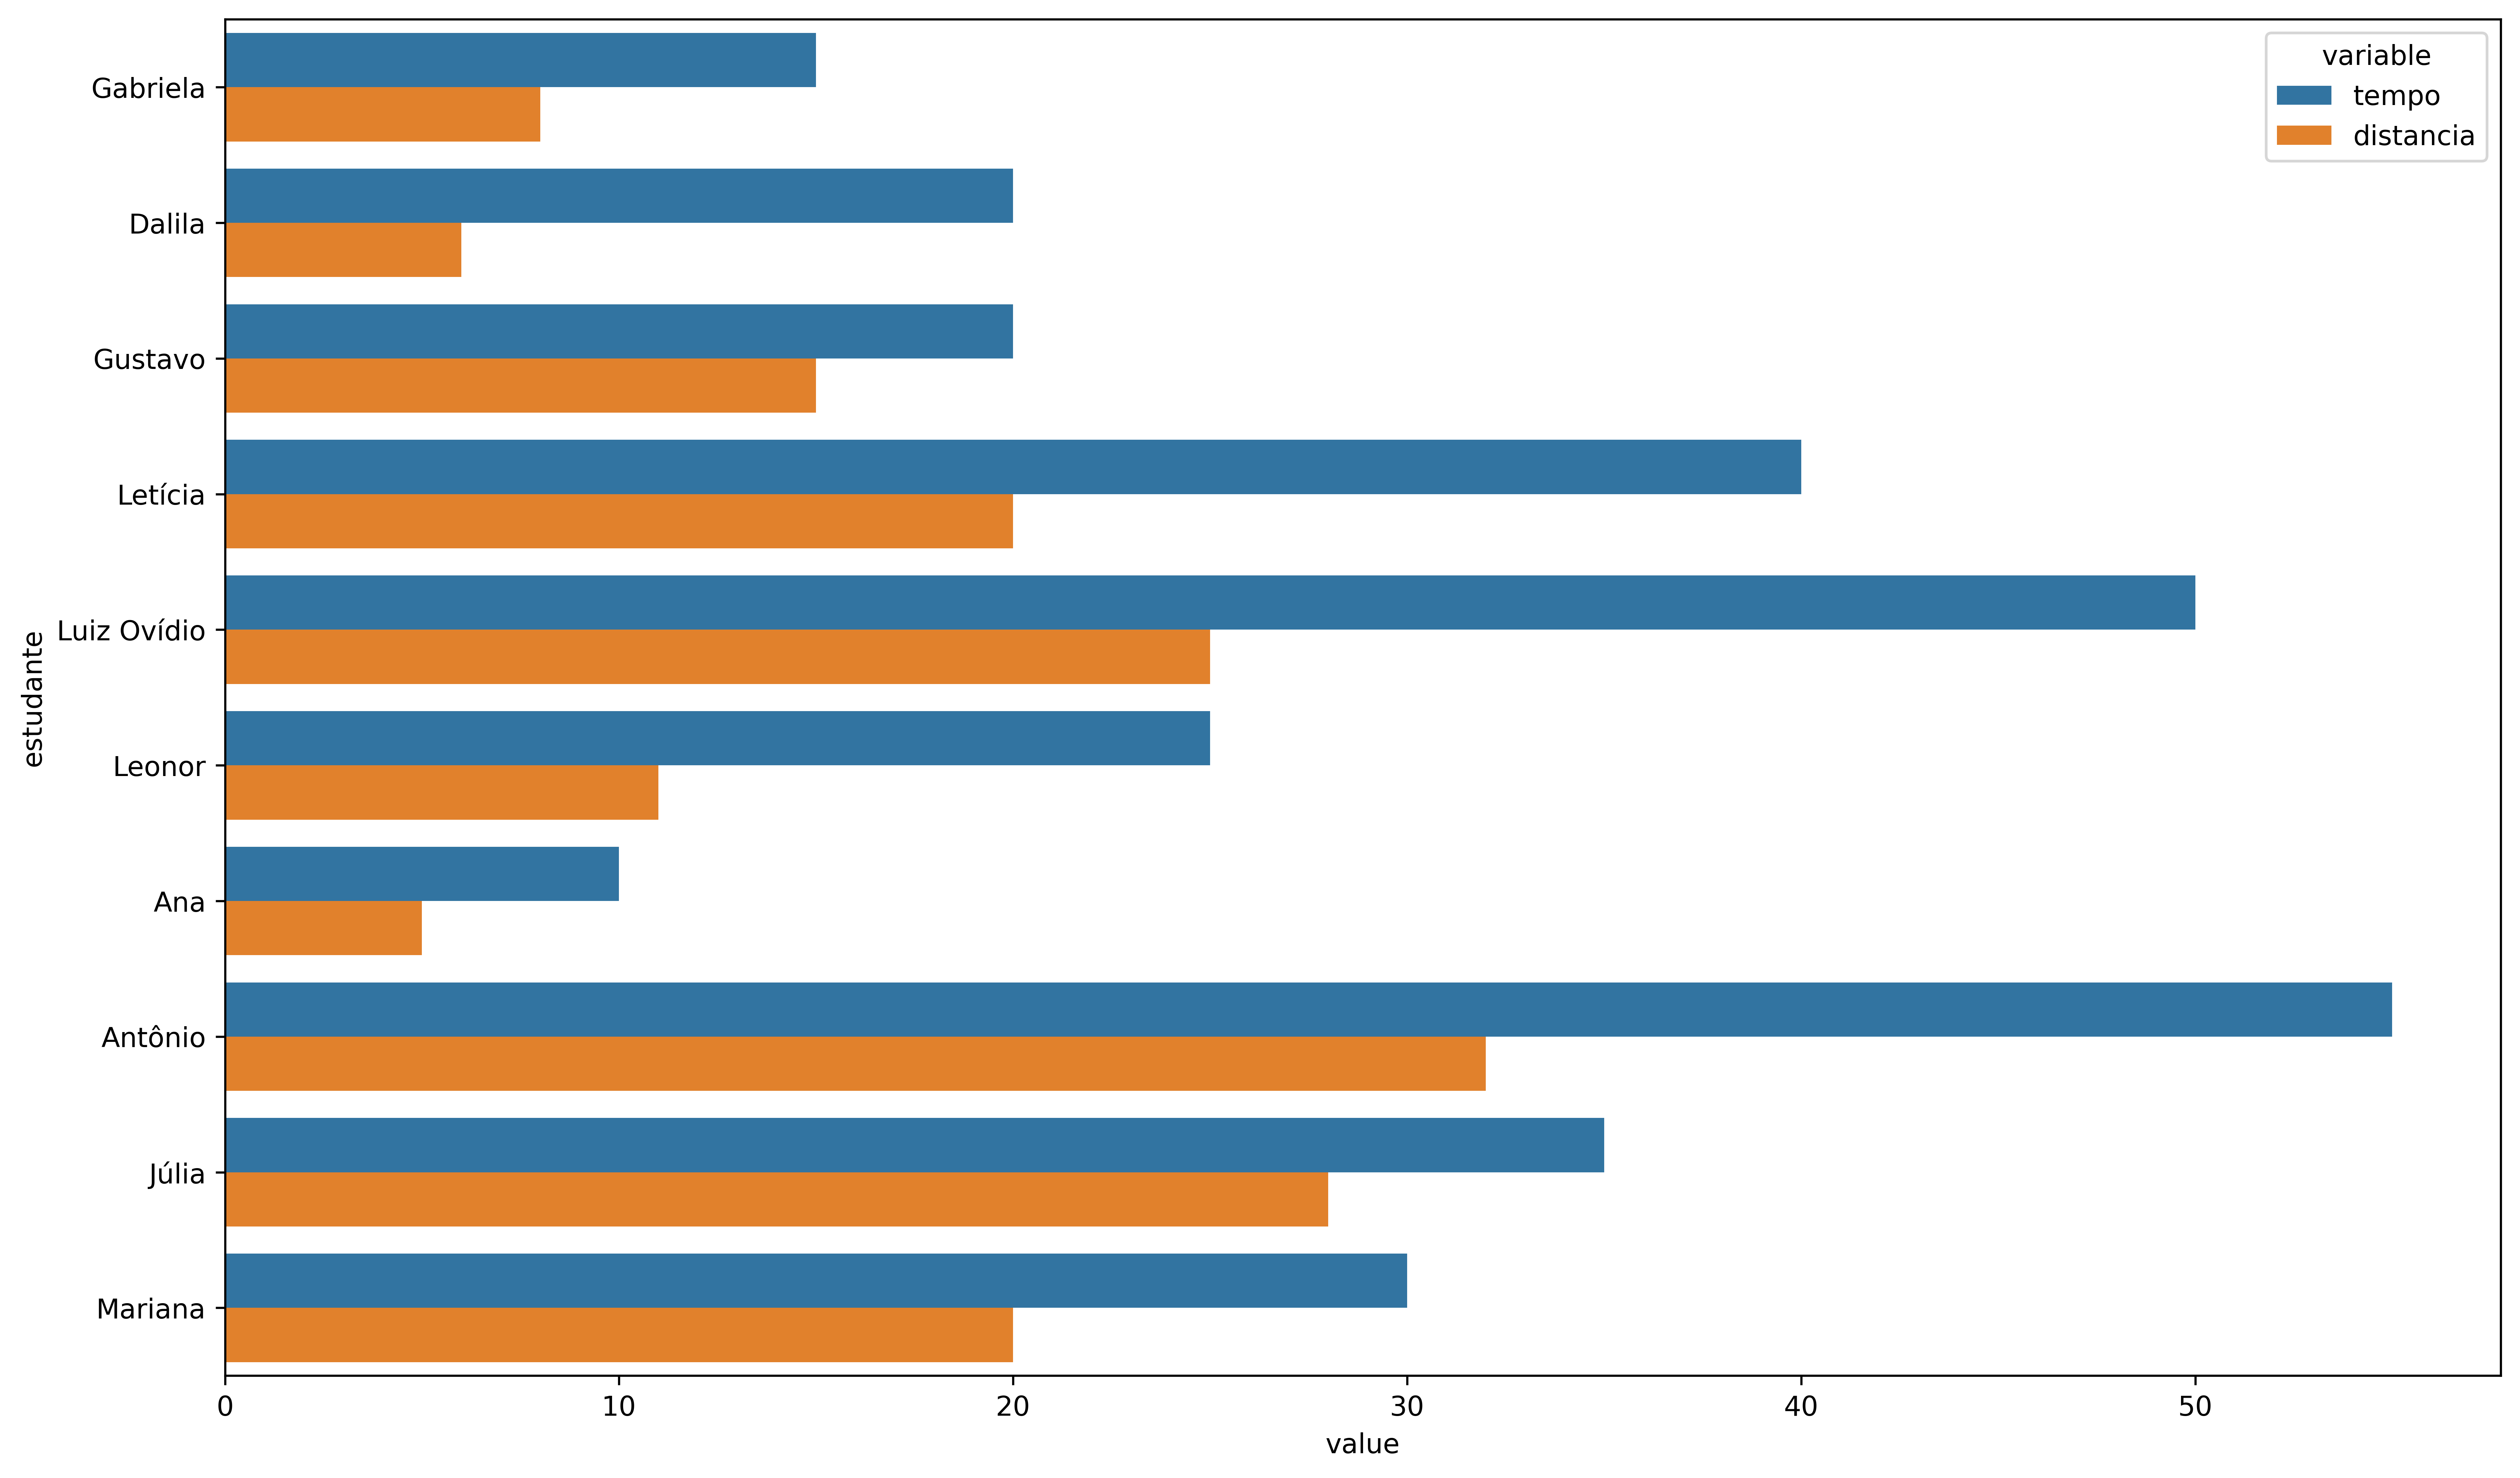

In [70]:
# Gerando um gráfico no novo DataFrame

plt.figure(figsize=(15,9), dpi = 600)
sns.barplot(data=df_estrutura, y='estudante', x='value', hue='variable')

In [71]:
#%% Encadeando funções

# Em certas circunstâncias é possível encadear uma função na outra
# Facilita a escrita e a leitura do código

(dados_tempo
.assign(sem_km = round((dados_novo['sem']/dados_novo ['dist']), 2))
.query('tempo >= 30')
.rename(columns={'periodo':'per'})
.groupby('per')
.agg({'sem_km':'mean',
      'distancia': 'mean',
      'per': 'count'}))

# Poderia criar um objeto normalmente!

df_ajustes = (dados_tempo
.assign(sem_km = round((dados_novo['sem']/dados_novo ['dist']), 2))
.query('tempo >= 30')
.rename(columns={'periodo':'per'})).sort_values('estudante').reset_index(drop=True)

#%% FIM!